# Further Advanced NumPy Modelling Examples

This notebook will involve no direct teaching - instead we are going to attempt to solve a number of difficult problems. These problems will attempt to range over a number of inter-disciplinary fields. Don't worry if you are not able to complete them all within the time of the workshop - they are meant to stretch your abilities, gain some useful NumPy experience and grow some inter-disciplinary knowledge. For these tasks we require that you **only** use NumPy arrays as this is considerably faster and the only tractable method in later examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.rcParams['figure.figsize'] = 15, 10
%matplotlib inline

# Tasks

## Stochastic Differential Equations

A *random walk* or *Brownian process* is a way of modelling error introduced by uncertainty into a differential equation. This has a range of applications, primarily in time-series modelling of uncertainty such as stock price in *Computational Finance*. The random variable representing the walk is denoted $W$. A single realization of the walk is written $W(t)$. We will assume:
1. Perfect knowledge at the beginning of the walk: $W(0)=0$
2. Every step is *independent* of every other step.

This leads us to a *discrete random walk*; given timesteps $t=0,\dots,T$ separated by a uniform step size $\delta t$ we have a single realization of the *random walk*:

$$
\Delta W_i=\sqrt{\delta t}\cal N[0, 1]
$$

where $\cal N[0, 1]$ refers to number generated from a normal distribution with mean = 0, and variance = 1. The walk $W$ is then calculated as the cumulative summation of all of the changes in $W$; $\Delta W$, the partial sum up to $i$ is hence:

$$
W_i = \left(\sum_{j=0}^{i-1} \Delta W_j \right)
$$

We can apply this walk to **stochastic differential equations** which are written in the form:

$$
\frac{\text{d}X}{\text{d}t}=f(X)+g(X)\frac{\Delta W}{\text{d}t}
$$

which has a formal solution:

$$
X(t)=X_0 + \int_0^1 f(X(s))\text{d}s + \int_0^1 g(X(s))\Delta W_s
$$

This can be approximated *numerically* using the **Euler-Maruyama** method, written in discrete subscript form:

$$
X_{n+1}=X_n+f_n\delta t+g_n \Delta W_n
$$


### Task 1.

Simulate a single realisation of a *Brownian process* using a step of $\delta t =\frac{1}{N}$ for $N=500$. $N$ is the number of points we will sample in linspace(). Go up to $T \in [0, 1]$. Use a fixed seed using np.random.seed(int). Plot $t$ against $W$.

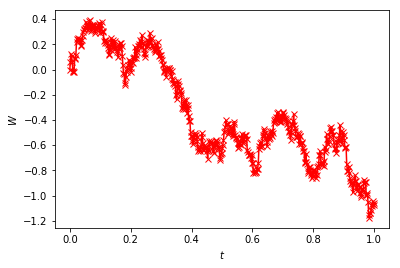

In [2]:
# your codes here
N = 500
dt = 1 / N
dW = np.sqrt(dt) * np.random.randn(N)
# set to 0 start
W = np.cumsum(dW) - dW[0]
t = np.linspace(0, 1, N)

plt.plot(t,W,'rx-')
plt.xlabel(r"$t$")
plt.ylabel(r"$W$")
plt.show()

### Task 2.

Simulate $10$ and $10^5$ realisations $M$ of a *Brownian process* using the same step size, and $T=10^4$. Plot $t$ against mean $W$ with respect to each timestep $t$.

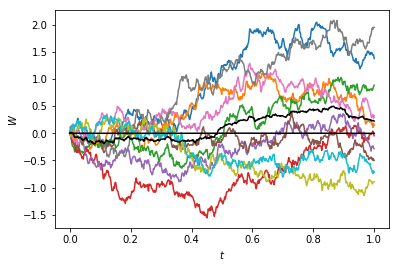

In [3]:
# your codes here
M1 = 10
M2 = 10**5
dW = np.sqrt(dt) * np.random.randn(N,M1)
dW2 = np.sqrt(dt) * np.random.randn(N,M2)
W1 = np.cumsum(dW, axis=0) - dW[0,:]
W2 = np.cumsum(dW2, axis=0) - dW2[0,:]
for i in range(M1):
    plt.plot(t, W1[:,i])
plt.plot(t, np.mean(W1,axis=1),'k-')
plt.plot(t, np.mean(W2,axis=1), 'k-')
plt.xlabel(r"$t$")
plt.ylabel(r"$W$")
plt.show()

### Task 3.

We have the **stochastic differential equation**:

$$
\text{d}X(t)=\lambda X(t)\delta t + \mu X(t)\Delta W(t), \qquad X(0)=1
$$

Write the function `euler_maruyama_step()` which takes $X_n$, $\delta t$, $\Delta W_n$, $\lambda=2$ and $\mu=1$ and returns $X_{n+1}$, where $f_n=\lambda X_n$ and $g_n=\mu X_n$.

In [4]:
# your codes here
def euler_maruyama_step(X_n, dt, dW_n, lamda=2., mu=1.):
    fn = lamda * X_n
    gn = mu * X_n
    return X_n + fn*dt + gn*dW_n

### Task 4.

Write the function `euler_maruyama()` which takes $N$ (the number of points), $\delta t$, a random walk $\Delta W$, and an initial position $X(0)$. This method should return an array of $X$ in time. This function should call `euler_maruyama_step()` every iteration. Run `euler_maruyama()` with $N=100$, $\lambda=2$, $\mu=1$, $X(0)=1$ from time $t=0, \dots, T$. 

In [5]:
# your codes here
def euler_maruyama(N, dt, dW, X_0):
    X = np.zeros(N)
    X[0]=X_0
    for n in range(N-1):
        X[n+1] = euler_maruyama_step(X[n], dt, dW[n], 2., 1.)
    return X

N = 100
dt = 1/N
dW = np.sqrt(dt)*np.random.randn(N)
X = euler_maruyama(N, dt, dW, 1.)

### Task 5.

The exact solution to the equation in *Task 3* is:

$$
X(t)=X(0)\exp \left[\left(\lambda - \frac{1}{2}\mu^2\right)t + \mu W(t)\right]
$$

Calculate the exact solution using the same timesteps for `euler_maruyama()`. Plot the exact solution (labelled) and the numerical solution (labelled) as a line plot to see the divergence. 

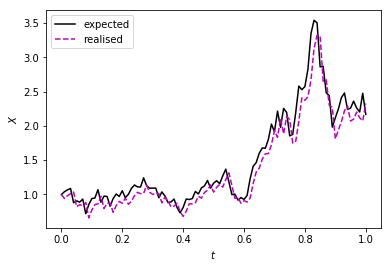

In [8]:
# your codes here

N = 100

def f_exact(t, W, lamda, mu, X0):
    return X0 * np.exp((lamda-.5*mu**2)*t + mu*W)

t, dt = np.linspace(0, 1, N+1, retstep=True)
dW = np.sqrt(dt)*np.random.randn(N+1)
W = np.cumsum(dW) - dW[0]
X = euler_maruyama(len(t), dt, dW, 1.)
X_exact = f_exact(t, W, 2., 1., 1.)

plt.plot(t, X_exact, 'k-', label='expected')
plt.plot(t, X, 'm--', label='realised')
plt.legend()
plt.xlabel(r"$t$")
plt.ylabel(r"$X$")
plt.show()

In [10]:
import dask.array as da

In [11]:
W

array([ 0.        ,  0.02460609,  0.03481445,  0.03899324, -0.18818924,
       -0.1725013 , -0.2085506 , -0.17437088, -0.44821654, -0.29233962,
       -0.21153109, -0.21799839, -0.1123904 , -0.31528108, -0.23400036,
       -0.25449916, -0.42857083, -0.31577501, -0.26313617, -0.31411052,
       -0.24696209, -0.36256835, -0.3284658 , -0.2600957 , -0.23061303,
       -0.26999614, -0.28666009, -0.18841368, -0.30032602, -0.34811315,
       -0.36141251, -0.37619923, -0.52906511, -0.45822214, -0.53053322,
       -0.64984269, -0.6551527 , -0.62359367, -0.78255853, -0.89822881,
       -0.80836326, -0.68342864, -0.70657497, -0.70590787, -0.61766801,
       -0.66723753, -0.59887137, -0.58727037, -0.53477766, -0.64625089,
       -0.59759124, -0.58227603, -0.63458094, -0.55599809, -0.49564858,
       -0.65228271, -0.84123862, -0.84946179, -0.95592494, -0.93126428,
       -0.97476533, -0.92913481, -0.7249582 , -0.6006838 , -0.57801705,
       -0.50416004, -0.47225972, -0.49034181, -0.43026276, -0.32

In [12]:
dW

array([-0.07976263,  0.02460609,  0.01020836,  0.00417879, -0.22718248,
        0.01568794, -0.03604931,  0.03417972, -0.27384565,  0.15587691,
        0.08080853, -0.0064673 ,  0.10560799, -0.20289067,  0.08128072,
       -0.0204988 , -0.17407167,  0.11279582,  0.05263884, -0.05097434,
        0.06714843, -0.11560626,  0.03410255,  0.06837011,  0.02948266,
       -0.03938311, -0.01666395,  0.09824641, -0.11191235, -0.04778713,
       -0.01329936, -0.01478671, -0.15286588,  0.07084297, -0.07231108,
       -0.11930948, -0.00531   ,  0.03155903, -0.15896487, -0.11567028,
        0.08986555,  0.12493462, -0.02314633,  0.0006671 ,  0.08823986,
       -0.04956952,  0.06836616,  0.011601  ,  0.05249271, -0.11147322,
        0.04865965,  0.01531521, -0.05230491,  0.07858285,  0.06034951,
       -0.15663413, -0.18895591, -0.00822317, -0.10646315,  0.02466066,
       -0.04350105,  0.04563052,  0.20417661,  0.1242744 ,  0.02266675,
        0.07385701,  0.03190032, -0.01808209,  0.06007905,  0.10

In [13]:
def euler_maruyama_updated(N, dt, R, dW, X_0=1.):
    # step function
    step_f = lambda X_n, dW_n, dt, lamba=2., mu=1.: X_n + lamba*X_n*dt + mu*X_n*dW_n 
    # set up
    X = np.zeros((R,N), dtype=np.float_)
    X[:, 0] = X_0
    for n in range(N-1):
        X[:, n+1] = step_f(X[:, n], dW[:, n], dt)
    return da.from_array(X, chunks=(R//2, N//2))

def f_exact_updated(t, W, lamda=2., mu=1., X0=1.):
    # t is vector, W is matrix
    X_e = np.zeros_like(W)
    for d in range(W.shape[0]):
        X_e[d, :] = X0 * np.exp((mu*W[d, :]) + (lamda-.5*mu**2)*t)
    return da.from_array(X_e, chunks=(100, t.shape[0]//2))

N = np.logspace(2, 5, 6, dtype=np.int_)
E = np.zeros_like(N)
R = 100

for i,n in enumerate(N):
    t, dt = np.linspace(0, 1, n+1, retstep=True)
    dW = (da.sqrt(dt) * da.random.normal(0., 1., size=(R, n+1), chunks=(R//2, n//2)))
    W = (da.cumsum(dW, axis=0) - dW[0, :])
    # calculate X directly, since each step is independent
    X = euler_maruyama_updated(t.shape[0], dt, R, dW)
    X_exact = f_exact_updated(t, W)
    # calculate error
    E[i] = da.linalg.norm(X-X_exact).compute()


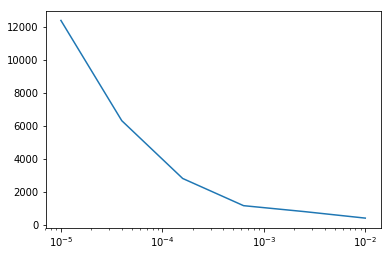

In [14]:
plt.semilogx(1/N, E)

## Molecular Dynamics

In molecular dynamics we are concerned with applying classical Newtonian laws to particles in cartesian space. Each particle has a location $\vec{X}_i$ which obeys:

$$
m_i \frac{d^2}{dt^2}\vec{x}_i = m_i\vec{A}_i = -\nabla V \left(\vec{x}_1, \dots, \vec{x}_N \right)
$$

For this example we will set $m_i=1$ for all $i$ to simplify things. We can think of every particle having a position within 3-D space as a 3-value vector:

$$
\vec{x}_i = (x_1, x_2, x_3)
$$

The change in position with respect to time can be thought of as the *speed* of the molecule, and likewise the change in speed with respect to time is considered the *acceleration* of the molecule:

$$
\frac{d}{dt}\vec{x}_i=\vec{x}_i'=\vec{v}_i, \qquad \frac{d^2}{dt^2}\vec{x}_i=\vec{x}_i''=\vec{A}_i
$$

This gives us a computational domain, once translated to the centre-of-mass, of $\vec{x} \in [-0.5,0.5]^3$. In addition to this, we want to model the *interaction* between particles - the simplest possibility is that the interaction potential $V$ is the sum of pairwise interactions:

$$
V \left(\vec{x}_1, \dots, \vec{x}_N \right)=\sum_i \sum_{j<i} \phi \left(L \left| \vec{x}_i - \vec{x}_j \right| \right)
$$

where $L$ refers to the reference length of the coordinate space. The most commonly used pairwise interaction potential is the *Lennard-Jones* potential:

$$
\phi(r)=4\epsilon \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]
$$

where $\epsilon$ is the depth of the potential well, $\sigma$ is the finite distance at which the inter-particle potential is 0, and $r$ is the distance between the particles. At the distance where the potential reaches it's minimum, $r_m = 2^{1/6}\sigma$. The $r^{-12}$ term describes repulsuion between molecules at short ranges due to overlapping electron orbitals, and the $r^{-6}$ term describes long-range attraction due to *van der Waals* forces. However to prevent the potential for extending to infinite distance, we use a cutoff: $\phi(r) \to \phi(r)-\phi(R_c)$, where $R_c=2.5$ is a constant, when $\sigma=1$, and $\epsilon=m_i$. Thus the derivative of our pairwise interaction potential function becomes:

$$
\frac{d}{dr}\phi(r) = 24\left[2\left(\frac{1}{r}\right)^{14}-\left(\frac{1}{r}\right)^8\right]
$$

thus we can calculate the *acceleration* of all the particles at each timestep as:

$$
\vec{A}_i = \sum_{j>i}(\vec{x}_i - \vec{x}_j)\frac{d}{dr}\phi(r)-\sum_{j<i}(\vec{x}_j - \vec{x}_i)\frac{d}{dr}\phi(r)
$$

Note that Newton's third law means that the force $F$ on *particle* $i$ from *particle* $j$ must be exactly the opposite to the force on *particle* $j$ from *particle* $i$. This means that:

$$
\vec{A}_i = \vec{A}_i + (\vec{x}_i - \vec{x}_j) \frac{d}{dr}\phi(r) \\
\vec{A}_j = \vec{A}_j - (\vec{x}_i - \vec{x}_j) \frac{d}{dr}\phi(r)
$$

This then is only part of the whole picture, once we have calculated *acceleration*, we need to evolve the movement of particles across time. One of the powerful algorithms for this is the **Velocity Verlet algorithm**:

1. Calculate next step $\vec{x}^{n+1}=\vec{x}^n + \delta t \ \vec{v}^n + \frac{1}{2}\delta t^2 \vec{A}^n$;
2. Apply boundary checks to $\vec{x}^{n+1}$;
3. Calculate vstar $\vec{v}^{*}=\vec{v}^n + \frac{1}{2}\delta t \ \vec{A}^n$;
4. Derive $\vec{A}^{n+1}$ from the interaction potential using $\vec{x}^{n+1}$;
5. Calculate $\vec{v}^{n+1}=\vec{v}^{*}+\frac{1}{2} \delta t \ \vec{A}^{n+1}$

This will evolve all of the particles in 3-D space over $\infty$ steps.

### Task 1.

Write a function `lennard_jones_potential()` that given $r$ as input, computes the derivative of $\phi(r)$.

In [7]:
# your codes here
def lennard_jones_potential(r):
    return 24.*(2.*(1/r)**14 - (1/r)**8)

### Task 2.

The algorithm for acceleration is as follows:

1. Initialise $\vec{A}_i=0$, $N=len(\vec{x})$, $P=dim(\vec{x})$, $i=0$, $j=0$.
1. For $i, \dots, N$
    1. Calculate $\vec{x}'=\vec{x}_i-\vec{x}$
    2. Compute $\vec{x}' = \vec{x}' - sign(\vec{x}')L \qquad$ where $\left|\vec{x}'\right| > \frac{L}{2}$, scaling by reference length.
    3. For $j = i+1, \dots, N$
        1. Calculate the magnitude of the coordinate changes, $r_{ij}=\sqrt{\vec{x}_j' \cdot \vec{x}_j'}.$
        2. If $r_{ij}<R_c$
            1. Calculate $ \frac{d}{dr}\phi(r_{ij})$
            2. Calculate $\vec{A}_i$.
            3. Calculate $\vec{A}_j$.
1. return $\vec{A}$.

Implement the function `acceleration()`, passing in $\vec{x}$, $L=10$, and $R_c=2.5$. Test `acceleration()` with two particles in an (3,2) numpy array, as $[4,0,0]$ and $[4+2^{\frac{1}{D}},0,0]$, which should lead to no/little acceleration with $D=6$. Compare this to $D=12$ to see the change in acceleration.

In [8]:
# your codes here
def acceleration(x, L, Rc):
    a = np.zeros_like(x)
    N,P = x.shape
    for i in range(N):
        dx = x[i,:] - x
        s = np.abs(dx) > L/2
        dx[s] -= np.sign(dx[s])*L
        for j in range(i+1,N):
            rij = np.sqrt(np.dot(dx[j,:],dx[j,:]))
            if rij < Rc:
                phi_r = lennard_jones_potential(rij)
                a[i,:] += dx[j,:]*phi_r
                a[j,:] -= dx[j,:]*phi_r
    return a

### Task 3.

Write the algorithm `verlet()` which takes as input $\vec{x}^n$, $\vec{v}^n$, $\vec{A}^n$, $\delta t$ and $L$, and returns $\vec{x}^{n+1}$, $\vec{v}^{n+1}$, $\vec{A}^{n+1}$. To boundary check, ensure that:

$$
\vec{x}^{n+1} = \vec{x}^{n+1} + L, \qquad \vec{x}^{n+1} < 0 \\
\vec{x}^{n+1} = \vec{x}^{n+1} - L, \qquad \vec{x}^{n+1} > L
$$ .

In [9]:
# your codes here
def verlet(x, v, a, dt, L):
    x = x + dt * v + .5 * dt**2 * a
    # boundary check
    x[x < 0] += L
    x[x > L] -= L
    vstar = v + .5 * dt * a
    a = acceleration(x, L, 2.5)
    v = vstar + .5 * dt * a
    return x, v, a

### Task 4.

Using the positional input:

$$
\vec{x}=\left[\begin{matrix}
    4 & 0 & 0 \\
    4+2^{\frac{1}{12}}&  0 &0
\end{matrix}\right]
$$

Generate 500 steps of the *velocity verlet* and at each timestep plot the scatterplot, using $\delta t=0.01$, $R_c=2.5$ and $L=10$.

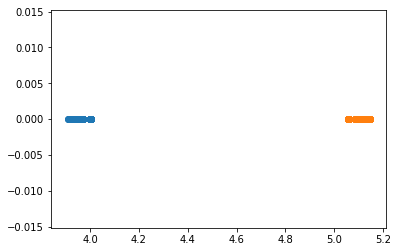

In [14]:
# your codes here

x = np.array([[4., 0., 0.],[4.+2.**(1/12),0.,0.]])
L = 10
Rc= 2.5
dt = 0.1
steps = 500
v = np.zeros_like(x)
a = acceleration(x, L, Rc)
t = np.arange(steps)

fig, ax = plt.subplots()

pos = np.zeros((2,3,steps))

for i in range(steps):
    x, v, a = verlet(x, v, a, dt, L)
    pos[:,:,i] = x.copy()

ax.scatter(pos[0,0,:], pos[0,1,:])
ax.scatter(pos[1,0,:], pos[1,1,:])

plt.show()

### Task 5.

The total kinetic energy of the particle can be calculated as:

$$
E_{kinetic,i}=\frac{1}{2}L^2 \left| \left| \vec{v}_i \right| \right|_2^2
$$

and henceforth the mean temperature of the system can be estimated from the total kinetic energy of each particle:

$$
T = \frac{2}{3N}\sum_{i=1}^N E_{kinetic,i}
$$

Write a function `calc_temperature()` which takes as inputs $\vec{v}$ and $L$, and returns the mean temperature of the system. Integrate this with the previous task and plot the mean temperature as a function of time (timesteps).

Text(0, 0.5, 'Temperature T')

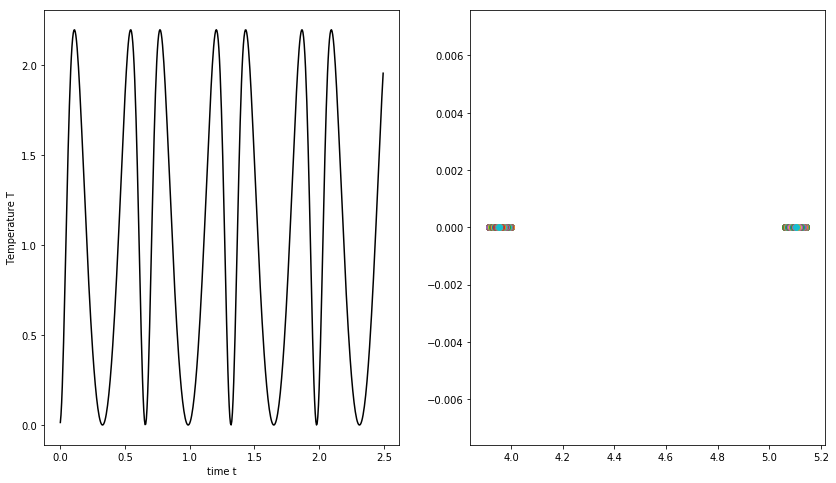

In [11]:
# your codes here

def calc_temperature(v, L):
    E = np.zeros((len(v)))
    for particle in range(len(v)):
        E[particle] = 0.5*(L**2)*(np.linalg.norm(v[particle]))**2
    return np.sum(E)*(2./(3.*len(E)))

steps = 500
x = np.array([[4., 0., 0.],[4.+2.**(1/12),0.,0.]])
v = np.zeros_like(x)
a = acceleration(x, L, Rc)
dt = 0.005
L = 6.1984
T = np.zeros(steps)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(steps):
    x, v, a = verlet(x, v, a, dt, L)
    T[i] = calc_temperature(v, L)
    ax2.scatter(x[:,0], x[:,1])

ax.plot(np.arange(0,steps*dt,dt), T, 'k-')
ax.set_xlabel("time t")
ax.set_ylabel("Temperature T")
plt.show()